In [1]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.color import label2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance


def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

## Explorative analysis of one CT scan

In [2]:
in_dir = "data/"
ct = dicom.read_file(in_dir + 'Training.dcm')
img = ct.pixel_array
print(img.shape)
print(img.dtype)

(512, 512)
int16


## Exercise 1

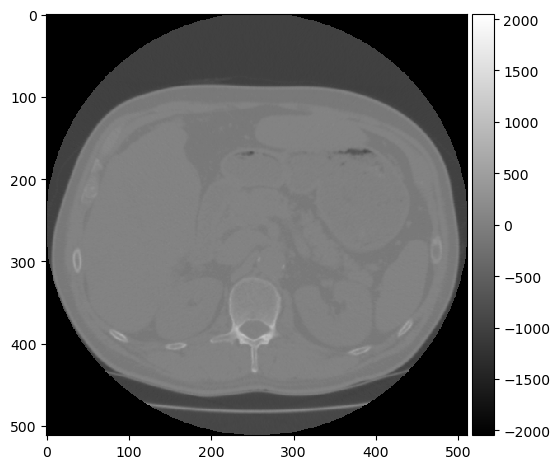

In [7]:
io.imshow(img, cmap='gray')
io.show()

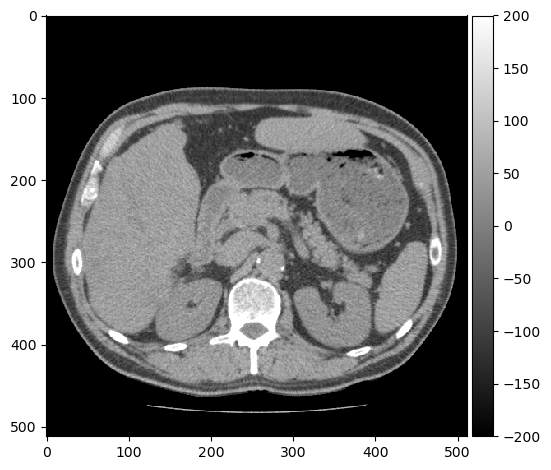

In [19]:
#Try to make a good visualization of the CT scan and spleen

minimum = np.min(img)
maximum = np.max(img)
io.imshow(img, vmin=-200, vmax=200, cmap='gray')
io.show()

In [20]:
spleen_roi = io.imread(in_dir + 'SpleenROI.png')
# convert to boolean image
spleen_mask = spleen_roi > 0
spleen_values = img[spleen_mask]

## Exercise 2

In [30]:
mu_spleen = np.average(spleen_values)
std_spleen = np.std(spleen_values)

print(f"The mean spleen HU is given by {mu_spleen:.2f} with corresponding standard deviation {std_spleen:.2f}")

The mean spleen HU is given by 49.48 with corresponding standard deviation 15.00


## Exercise 3

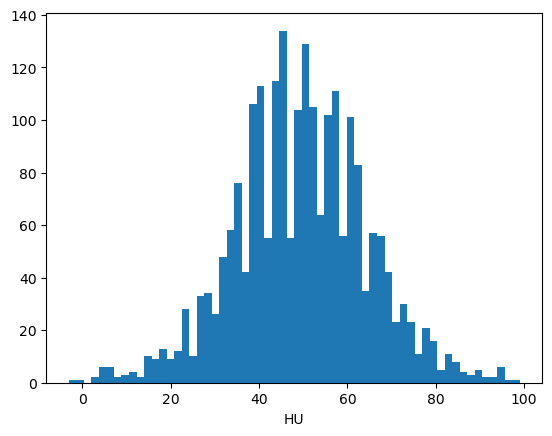

In [46]:
plt.figure()
plt.hist(spleen_values.ravel(), bins = 60)
plt.xlabel("HU")
plt.title("")
plt.show()

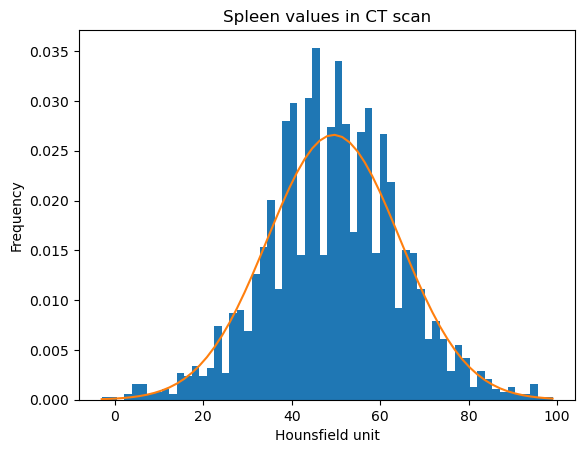

In [41]:
n, bins, patches = plt.hist(spleen_values, 60, density=1)
pdf_spleen = norm.pdf(bins, mu_spleen, std_spleen)
plt.plot(bins, pdf_spleen)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Spleen values in CT scan')
plt.show()

## Exercise 4

In [67]:
bone_roi = io.imread(in_dir + 'BoneROI.png')
bone_mask = bone_roi > 0
bone_values = img[bone_mask]
mu_bone = np.average(bone_values)
std_bone = np.std(bone_values)

fat_roi = io.imread(in_dir + 'FatROI.png')
fat_mask = fat_roi > 0
fat_values = img[fat_mask]
mu_fat = np.average(fat_values)
std_fat = np.std(fat_values)

kidney_roi = io.imread(in_dir + 'KidneyROI.png')
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
mu_kidney = np.average(kidney_values)
std_kidney = np.std(kidney_values)

liver_roi = io.imread(in_dir + 'LiverROI.png')
liver_mask = liver_roi > 0
liver_values = img[liver_mask]
mu_liver = np.average(liver_values)
std_liver = np.std(liver_values)

background_roi = io.imread(in_dir + 'BackgroundROI.png')
background_mask = background_roi > 0
background_values = img[background_mask]
mu_background = np.average(background_values)
std_background = np.std(background_values)

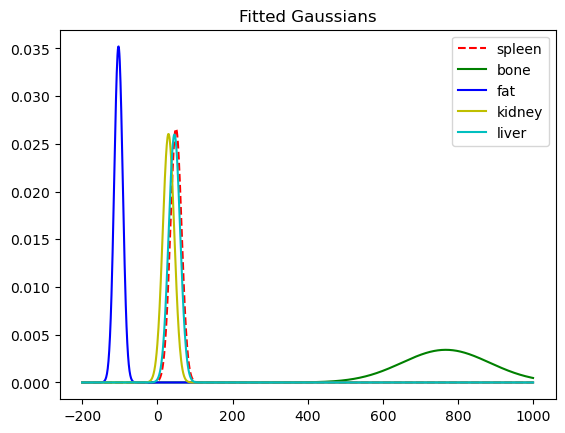

In [68]:
# Hounsfield unit limits of the plot
min_hu = -200
max_hu = 1000
hu_range = np.arange(min_hu, max_hu, 1.0)
pdf_spleen = norm.pdf(hu_range, mu_spleen, std_spleen)
pdf_bone = norm.pdf(hu_range, mu_bone, std_bone)
pdf_fat = norm.pdf(hu_range, mu_fat, std_fat)
pdf_kidney = norm.pdf(hu_range, mu_kidney, std_kidney)
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)
pdf_background = norm.pdf(hu_range, mu_background, std_background)
plt.plot(hu_range, pdf_spleen, 'r--', label="spleen")
plt.plot(hu_range, pdf_bone, 'g', label="bone")
plt.plot(hu_range, pdf_fat, 'b', label="fat")
plt.plot(hu_range, pdf_kidney, 'y', label="kidney")
plt.plot(hu_range, pdf_liver, 'c', label="liver")
plt.title("Fitted Gaussians")
plt.legend()
plt.show()

C:\Users\Christian\AppData\Local\Temp\ipykernel_24228\2074140870.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([spleen_values, kidney_values, fat_values, bone_values, liver_values])


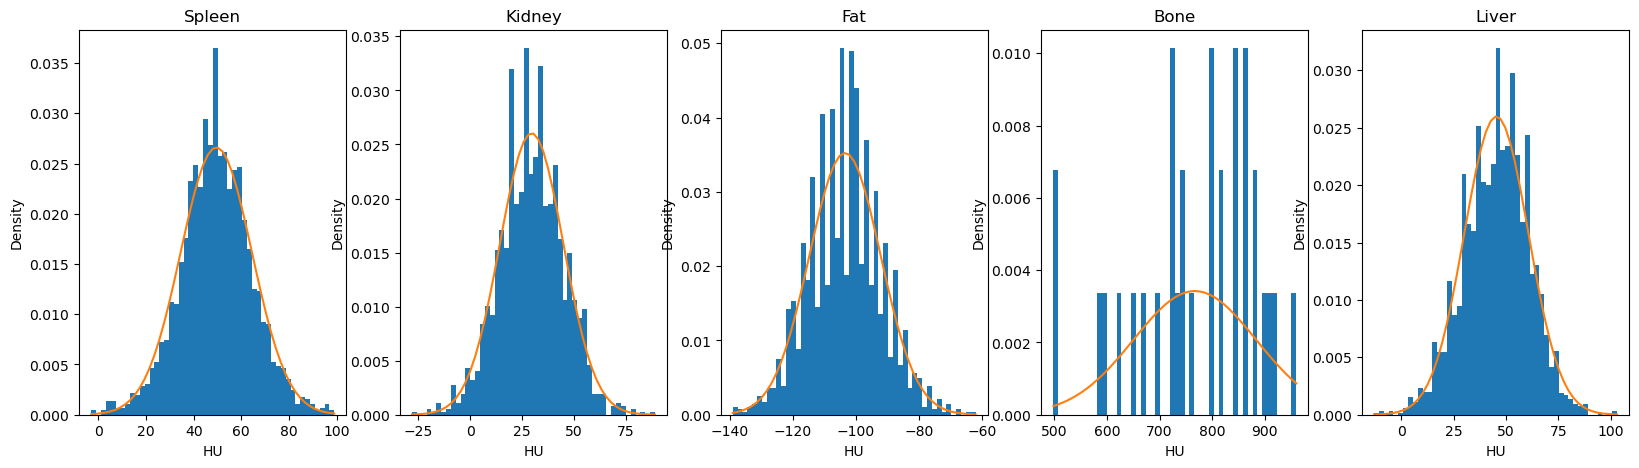

In [69]:
# gather in array for easy plotting 
means = np.array([mu_spleen, mu_kidney, mu_fat, mu_bone, mu_liver])
stds = np.array([std_spleen, std_kidney, std_fat, std_bone, std_liver])
titles = np.array(["Spleen", "Kidney", "Fat", "Bone", "Liver"])
values = np.array([spleen_values, kidney_values, fat_values, bone_values, liver_values])
ns, bins, patches = [], [], []
fig, ax = plt.subplots(1, 5, figsize = (20, 5))
for i in range(5): 
    n, bin, patch = ax[i].hist(values[i].ravel(), bins = 50, density=True)
    ns.append(n), bins.append(bin), patches.append(patch)
    ax[i].plot(bin, norm.pdf(bin, means[i], stds[i]))
    ax[i].set_xlabel("HU")
    ax[i].set_ylabel("Density")
    ax[i].set_title(titles[i])
plt.show()

## Exercise 5

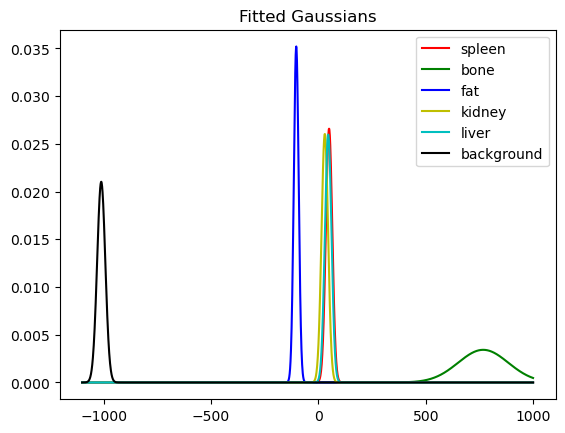

In [77]:
# Hounsfield unit limits of the plot
min_hu = -1100
max_hu = 1000
hu_range = np.arange(min_hu, max_hu, 1.0)
pdf_spleen = norm.pdf(hu_range, mu_spleen, std_spleen)
pdf_bone = norm.pdf(hu_range, mu_bone, std_bone)
pdf_fat = norm.pdf(hu_range, mu_fat, std_fat)
pdf_kidney = norm.pdf(hu_range, mu_kidney, std_kidney)
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)
pdf_background = norm.pdf(hu_range, mu_background, std_background)
plt.plot(hu_range, pdf_spleen, 'r', label="spleen")
plt.plot(hu_range, pdf_bone, 'g', label="bone")
plt.plot(hu_range, pdf_fat, 'b', label="fat")
plt.plot(hu_range, pdf_kidney, 'y', label="kidney")
plt.plot(hu_range, pdf_liver, 'c', label="liver")
plt.plot(hu_range, pdf_background, 'k', label="background")
plt.title("Fitted Gaussians")
plt.legend()
plt.show()

## Minimum distance pixel classification

## Exercise 7

In [101]:
t_background = -200
t_fat_soft = (mu_fat+mu_kidney)/2
t_soft_bone = (mu_spleen+mu_bone)/2
#t_soft_bone = 300

background_img = (img < t_background)
fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
bone_img = (img > t_soft_bone)

## Exercise 8

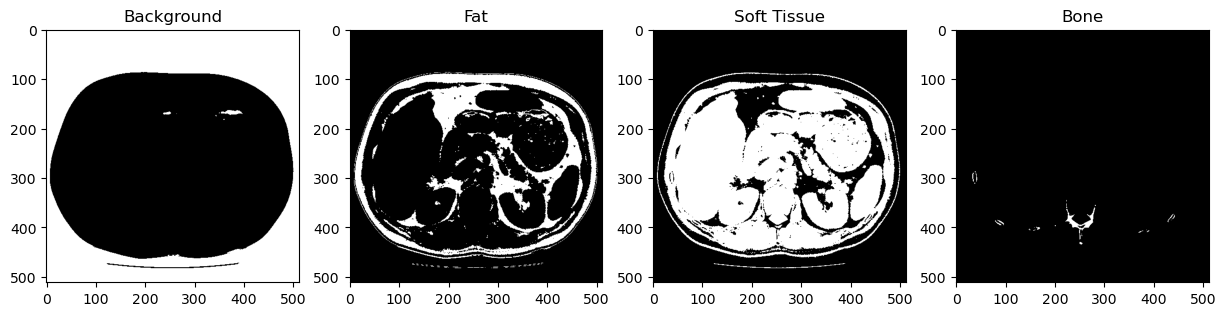

In [102]:
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
ax[0].imshow(background_img, cmap = "gray")
ax[0].set_title("Background")
ax[1].imshow(fat_img, cmap = "gray")
ax[1].set_title("Fat")
ax[2].imshow(soft_img, cmap = "gray")
ax[2].set_title("Soft Tissue")
ax[3].imshow(bone_img, cmap = "gray")
ax[3].set_title("Bone")
plt.show()

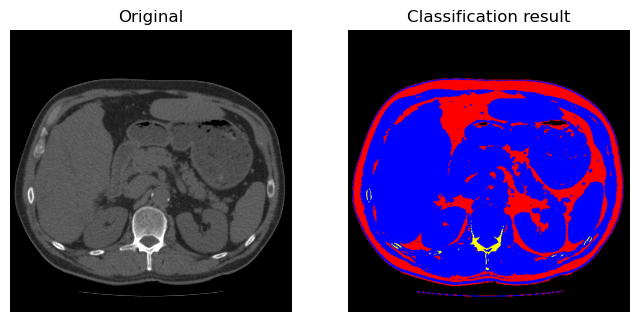

In [103]:
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

## Exercise 9 - Parametric pixel classification

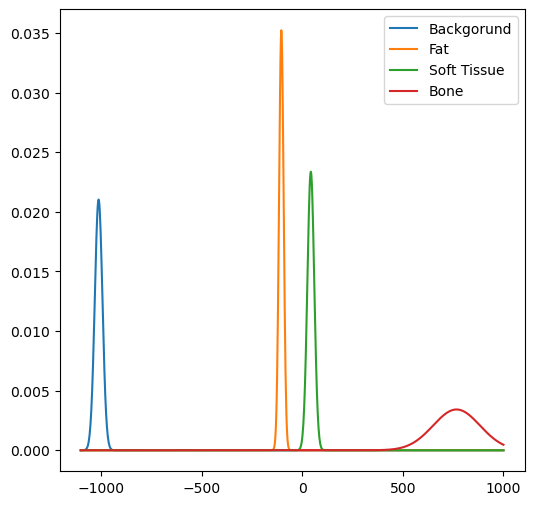

In [105]:
soft_tissue_values = np.append(kidney_values, spleen_values)
soft_tissue_values = np.append(soft_tissue_values, liver_values)
(mu_soft, std_soft) = norm.fit(soft_tissue_values)

means = np.array([mu_background, mu_fat, mu_soft, mu_bone])
stds = np.array([std_background, std_fat, std_soft, std_bone])
titles = np.array(["Backgorund", "Fat", "Soft Tissue", "Bone"])
x = np.linspace(-1100, 1000, 1000)
plt.figure(figsize = (6, 6))
for i in range(4): 
    plt.plot(x, norm.pdf(x, means[i], stds[i]), label = titles[i])
plt.legend()
plt.show()


## Exercise 10

In [108]:
#Found by inspecting the plot and seeing where the Gaussian crosses
for test_value in range(-50, -40):
    if norm.pdf(test_value, mu_fat, std_fat) > norm.pdf(test_value, mu_soft, std_soft):
        print(f"For value {test_value} the class is fat")
    else:
        print(f"For value {test_value} the class is soft tissue")

For value -50 the class is fat
For value -49 the class is fat
For value -48 the class is fat
For value -47 the class is fat
For value -46 the class is fat
For value -45 the class is fat
For value -44 the class is soft tissue
For value -43 the class is soft tissue
For value -42 the class is soft tissue
For value -41 the class is soft tissue


In [111]:
for test_value in range(135, 145):
    if norm.pdf(test_value, mu_soft, std_soft) > norm.pdf(test_value, mu_bone, std_bone):
        print(f"For value {test_value} the class is soft tissue")
    else:
        print(f"For value {test_value} the class is bone")

For value 135 the class is soft tissue
For value 136 the class is soft tissue
For value 137 the class is soft tissue
For value 138 the class is soft tissue
For value 139 the class is soft tissue
For value 140 the class is soft tissue
For value 141 the class is bone
For value 142 the class is bone
For value 143 the class is bone
For value 144 the class is bone


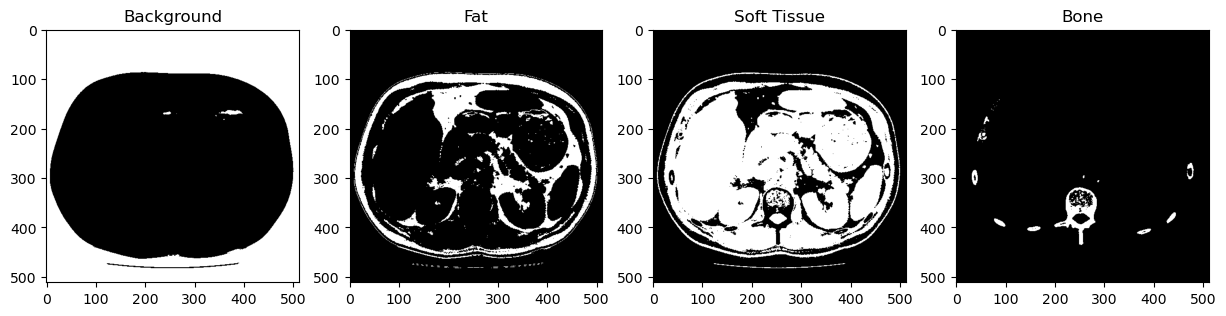

In [112]:
t_background = -200
t_fat_soft = -45 
t_soft_bone = 141

# compute bimary images 
background_img = img <= t_background 
fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
bone_img = img > t_soft_bone 

fig, ax = plt.subplots(1, 4, figsize = (15, 5))
ax[0].imshow(background_img, cmap = "gray")
ax[0].set_title("Background")
ax[1].imshow(fat_img, cmap = "gray")
ax[1].set_title("Fat")
ax[2].imshow(soft_img, cmap = "gray")
ax[2].set_title("Soft Tissue")
ax[3].imshow(bone_img, cmap = "gray")
ax[3].set_title("Bone")
plt.show()

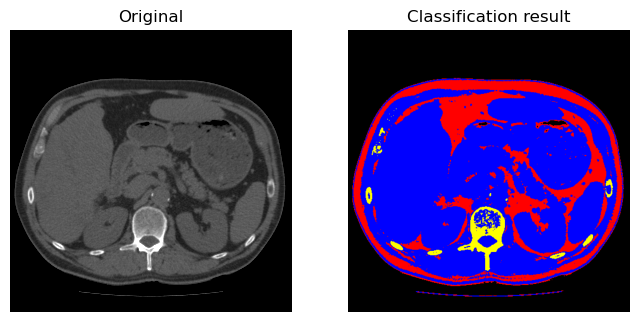

In [113]:
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

## Exercise 11: Object segmentation - The spleen finder

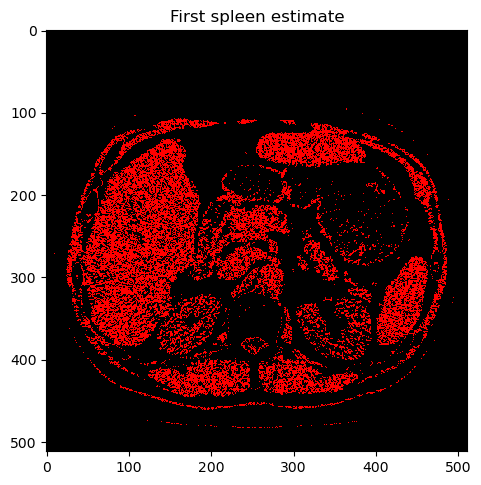

In [115]:
t_1 = 35
t_2 = 65

spleen_estimate = (img > t_1) & (img < t_2)
spleen_label_colour = color.label2rgb(spleen_estimate)
io.imshow(spleen_label_colour)
plt.title("First spleen estimate")
io.show()

## Exercise 12

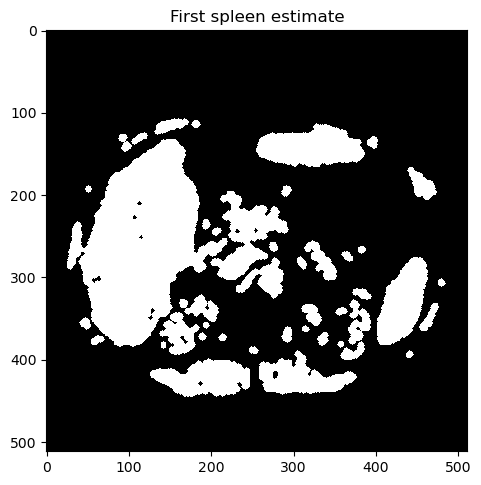

In [127]:
footprint = disk(2)
closed = binary_closing(spleen_estimate, footprint)

footprint = disk(4)
opened = binary_opening(closed, footprint)

io.imshow(opened)
plt.title("First spleen estimate")
io.show()

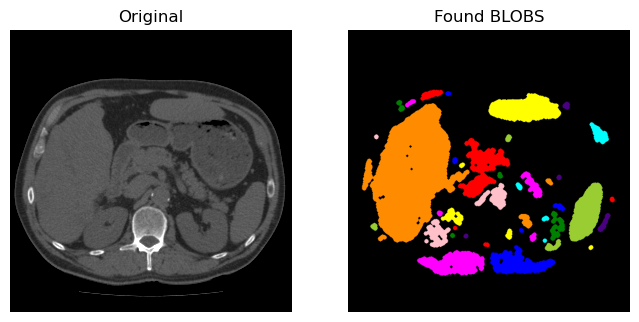

In [128]:
label_img = measure.label(opened)
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Found BLOBS')

## Exercise 13

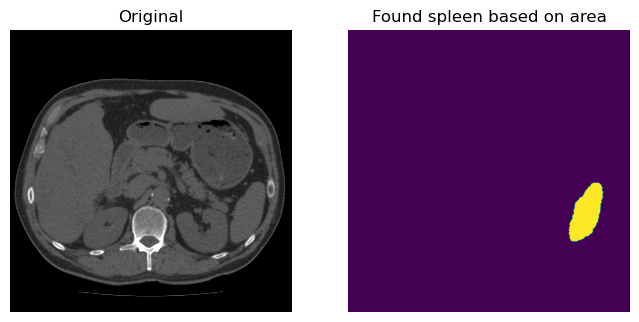

In [138]:
region_props = measure.regionprops(label_img)

min_area = 4000
max_area = 4200

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img, i_area, 'Found spleen based on area')

## Exercise 14

## Exercise 15

In [153]:
def spleen_finder(img):
    
    t_1 = 35
    t_2 = 65

    spleen_estimate = (img > t_1) & (img < t_2)
    
    min_area = 3750
    max_area = 3800
    
    footprint = disk(2)
    closed = binary_closing(spleen_estimate, footprint)

    footprint = disk(4)
    opened = binary_opening(closed, footprint)
    
    label_img = measure.label(opened)

    region_props = measure.regionprops(label_img)
    label_img_filter = label_img.copy()
    
    for region in region_props:
        # Find the areas that do not fit our criteria
        if region.area > max_area or region.area < min_area:
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0
    # Create binary image from the filtered label image
    i_area = label_img_filter > 0
    show_comparison(img, i_area, 'Found spleen')

## Exercise 16

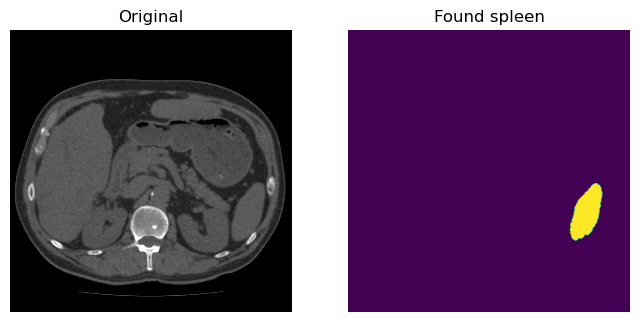

In [154]:
spleen_finder(io.imread("data/Validation1.dcm"))